In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [2]:
df = pd.read_csv(r'C:\Users\dell\PAH\data12345.csv')

In [3]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        df_index = i + n_steps
        if df_index > len(sequence)-1:
            break
        df_X, df_Y = sequence[i : df_index], sequence[df_index]
        X.append(df_X)
        y.append(df_Y)
    return np.array(X), np.array(y)

In [4]:
df

,He,WS,Hu,T,PIP,COD,NH3-N,TP,pH,SS
0,0.06,1.7,80.0,29.8,0.1,423.780029,32.360302,1.463363,7.689810,275.76
1,0.16,1.9,78.0,30.4,0.0,423.780029,29.472183,1.466720,7.679555,245.12
2,0.17,0.7,89.0,29.0,0.0,414.401672,33.063755,1.467025,7.676137,245.12
3,0.19,0.7,89.0,29.0,0.4,414.267395,29.009369,1.466109,7.668362,268.10
4,0.04,1.7,84.0,29.0,0.4,414.267395,31.072420,1.466720,7.656484,260.44
...,...,...,...,...,...,...,...,...,...,...
2203,0.01,0.0,75.0,28.1,0.0,283.486420,35.352642,1.700156,7.791284,283.42
2204,0.15,0.5,80.0,28.0,0.0,140.049439,35.036469,1.846370,7.790387,160.86
2205,0.04,0.3,81.0,27.8,0.0,456.617950,35.294960,1.846065,7.793591,298.74
2206,0.07,1.0,86.0,27.4,0.0,456.495850,35.279396,1.709952,7.792737,237.46


In [5]:
windows =  1
X1, y = split_sequence(df['He'], windows)
X2, y = split_sequence(df['WS'], windows)
X3, y = split_sequence(df['Hu'], windows)
X4, y = split_sequence(df['T'], windows)
X5, y = split_sequence(df['PIP'], windows)
X6, y = split_sequence(df['COD'], windows)
X7, y = split_sequence(df['TP'], windows)
X8, y = split_sequence(df['pH'], windows)
X9, y = split_sequence(df['SS'], windows)
X10, y = split_sequence(df['NH3-N'], windows)

In [6]:
X1 = pd.DataFrame(X1.copy())
X2 = pd.DataFrame(X2.copy())
X3 = pd.DataFrame(X3.copy())
X4 = pd.DataFrame(X4.copy())
X5 = pd.DataFrame(X5.copy())
X6 = pd.DataFrame(X6.copy())
X7 = pd.DataFrame(X7.copy())
X8 = pd.DataFrame(X8.copy())
X9 = pd.DataFrame(X9.copy())
X10 = pd.DataFrame(X10.copy())

In [7]:
X1.columns=['He'+str(i) for i in range(1, windows+1)]
X2.columns=['WS'+str(i) for i in range(1, windows+1)]
X3.columns=['Hu'+str(i) for i in range(1, windows+1)]
X4.columns=['T'+str(i) for i in range(1, windows+1)]
X5.columns=['PIP'+str(i) for i in range(1, windows+1)]
X6.columns=['COD'+str(i) for i in range(1, windows+1)]
X7.columns=['TP'+str(i) for i in range(1, windows+1)]
X8.columns=['pH'+str(i) for i in range(1, windows+1)]
X9.columns=['SS'+str(i) for i in range(1, windows+1)]
X10.columns=['NH3-N'+str(i) for i in range(1, windows+1)]

In [8]:
X = pd.concat([X1,X2,X3,X4,X5,X6,X7,X8,X9],axis=1)

In [9]:
y1 = df['NH3-N'].values[12:]
y2 = df['TP'].values[12:]
y3 = df['SS'].values[12:]
y4 = df['COD'].values[12:]

In [10]:
df=pd.concat([X,pd.DataFrame(y)],axis=1)

In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
X = df.drop(columns=[df.columns[-1]])
y = df[df.columns[-1]]

In [13]:
columns_list = list(X.columns).copy()

In [14]:
model_M1 = MinMaxScaler()
model_M2 = MinMaxScaler()

In [15]:
X = model_M1.fit_transform(X)
y = model_M2.fit_transform(y.values.reshape(-1,1))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = X_train.reshape((X_train.shape[0], 1, int(X_train.shape[1]/1)))
X_test = X_test.reshape((X_test.shape[0], 1, int(X_test.shape[1]/1)))

In [18]:
def Create_LSTM(X_train, utils):

    model = Sequential()

    model.add(LSTM(int(utils[0]), input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(0.0003), loss='mean_squared_error')

    return model

In [19]:
model = Create_LSTM(X_train, [128])

In [20]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 25,
    verbose = 1,
    restore_best_weights = True
)

callbacks = [early_stopping]

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=256, callbacks=callbacks)

Epoch 1/1000
7/7 [==============================] - 2s 77ms/step - loss: 0.2706 - val_loss: 0.2430
Epoch 2/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.2312 - val_loss: 0.2058
Epoch 3/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1951 - val_loss: 0.1723
Epoch 4/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1629 - val_loss: 0.1425
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1345 - val_loss: 0.1165
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1098 - val_loss: 0.0943
Epoch 7/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0891 - val_loss: 0.0759
Epoch 8/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0722 - val_loss: 0.0612
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0587 - val_loss: 0.0501
Epoch 10/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0488 - val_loss: 0.0422
Epoch 11/1000
7/7 

Epoch 84/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0292 - val_loss: 0.0278
Epoch 85/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.0292 - val_loss: 0.0278
Epoch 86/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0292 - val_loss: 0.0278
Epoch 87/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0292 - val_loss: 0.0278
Epoch 88/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0291 - val_loss: 0.0278
Epoch 89/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0291 - val_loss: 0.0278
Epoch 90/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0291 - val_loss: 0.0277
Epoch 91/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0291 - val_loss: 0.0277
Epoch 92/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0291 - val_loss: 0.0277
Epoch 93/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0291 - val_loss: 0.0277
Epoch 94/

7/7 [==============================] - 0s 8ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 167/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 168/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 169/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 170/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 171/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 172/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 173/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 174/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 175/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0288 - val_loss: 0.0276
Epoch 176/1000

7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 249/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 250/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 251/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 252/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 253/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 254/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 255/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 256/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 257/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0286 - val_loss: 0.0275
Epoch 258/1000


7/7 [==============================] - 0s 8ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 331/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 332/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 333/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 334/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 335/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 336/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 337/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 338/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 339/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0284 - val_loss: 0.0273
Epoch 340/1000


7/7 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 413/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 414/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 415/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 416/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 417/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 418/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 419/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 420/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 421/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0280 - val_loss: 0.0270
Epoch 422/1000


7/7 [==============================] - 0s 9ms/step - loss: 0.0273 - val_loss: 0.0264
Epoch 495/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0273 - val_loss: 0.0264
Epoch 496/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0273 - val_loss: 0.0264
Epoch 497/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.0273 - val_loss: 0.0264
Epoch 498/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0264
Epoch 499/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0264
Epoch 500/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0264
Epoch 501/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0264
Epoch 502/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0264
Epoch 503/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0272 - val_loss: 0.0264
Epoch 504/1000

7/7 [==============================] - 0s 8ms/step - loss: 0.0262 - val_loss: 0.0256
Epoch 577/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0262 - val_loss: 0.0256
Epoch 578/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0262 - val_loss: 0.0256
Epoch 579/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0262 - val_loss: 0.0255
Epoch 580/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 0.0256
Epoch 581/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 582/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 583/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 584/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 585/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0261 - val_loss: 0.0255
Epoch 586/1000


7/7 [==============================] - 0s 8ms/step - loss: 0.0251 - val_loss: 0.0247
Epoch 659/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0251 - val_loss: 0.0246
Epoch 660/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0251 - val_loss: 0.0246
Epoch 661/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0251 - val_loss: 0.0246
Epoch 662/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0251 - val_loss: 0.0246
Epoch 663/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0251 - val_loss: 0.0247
Epoch 664/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0250 - val_loss: 0.0246
Epoch 665/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0251 - val_loss: 0.0246
Epoch 666/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0250 - val_loss: 0.0246
Epoch 667/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0250 - val_loss: 0.0245
Epoch 668/1000


7/7 [==============================] - 0s 8ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 741/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 742/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 743/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 744/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 745/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 746/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0242 - val_loss: 0.0236
Epoch 747/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0242 - val_loss: 0.0236
Epoch 748/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0241 - val_loss: 0.0237
Epoch 749/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0241 - val_loss: 0.0236
Epoch 750/1000


7/7 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0229
Epoch 823/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0235 - val_loss: 0.0229
Epoch 824/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0229
Epoch 825/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0229
Epoch 826/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0229
Epoch 827/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 828/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 829/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 830/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 831/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0235 - val_loss: 0.0228
Epoch 832/1000


7/7 [==============================] - 0s 9ms/step - loss: 0.0231 - val_loss: 0.0222
Epoch 905/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0223
Epoch 906/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0223
Epoch 907/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0223
Epoch 908/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0223
Epoch 909/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0222
Epoch 910/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0222
Epoch 911/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0222
Epoch 912/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0222
Epoch 913/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0230 - val_loss: 0.0222
Epoch 914/1000


7/7 [==============================] - 0s 9ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 987/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 988/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 989/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 990/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0227 - val_loss: 0.0219
Epoch 991/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 992/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0227 - val_loss: 0.0219
Epoch 993/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 994/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0227 - val_loss: 0.0219
Epoch 995/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.0227 - val_loss: 0.0219
Epoch 996/1000


In [22]:
def plot_performance(Loss1, Loss2, Loss3, ylim_pad = [0.1, 0.1]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 6))

    y1 = Loss1
    y2 = Loss2

    min_y = min(min(y1), min(y2)) - ylim_pad[0]
    max_y = max(max(y1), max(y2)) + ylim_pad[0]

    plt.plot(y1)
    plt.plot(y2)

    plt.title(f'Model {Loss3}\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(f'{Loss3}', fontsize=15)
    plt.ylim(float(min_y) - 0.1, float(max_y) + 0.1)
    plt.legend(legends, loc='upper left')
    plt.grid()
    plt.show()

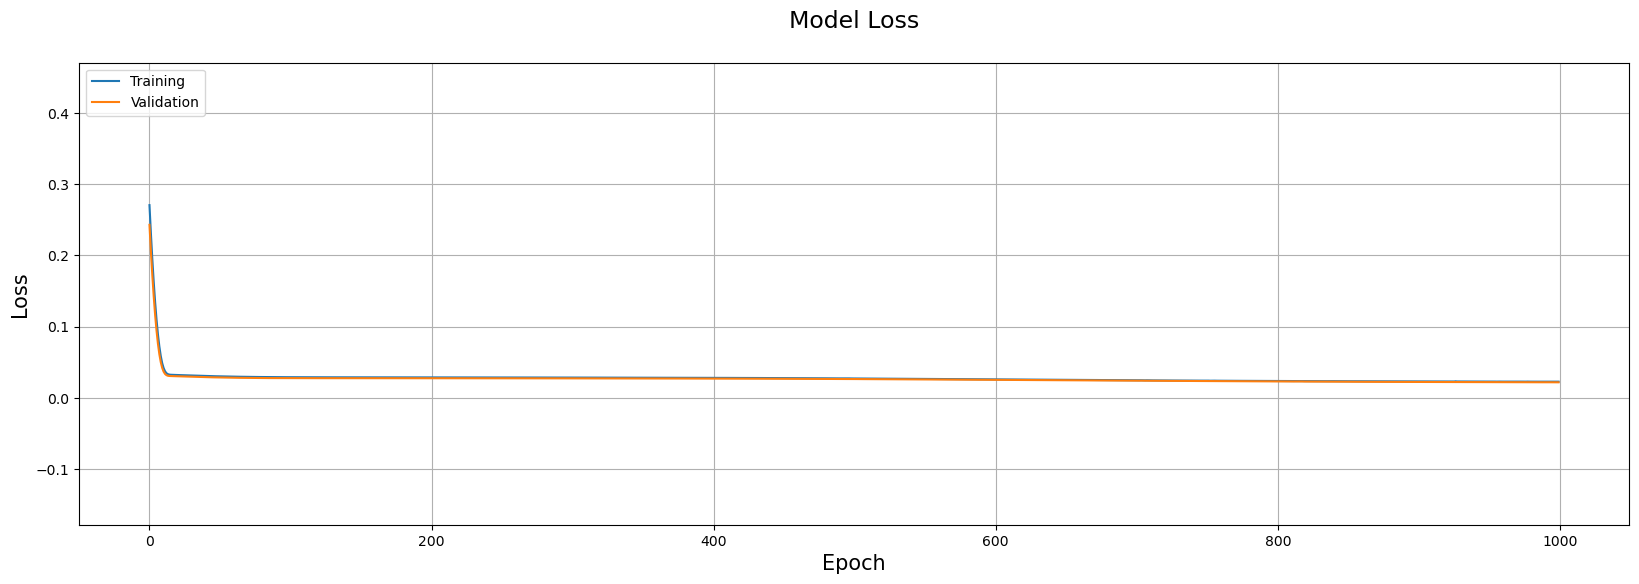

In [23]:
plot_performance(history.history['loss'], history.history['val_loss'], 'Loss')

In [24]:
predict = model.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [25]:
def R2(y_test, predict):

    score = r2_score(y_test, predict)

    return score

In [26]:
R2(y_test, predict.reshape(-1, 1))

0.30920626834525156

In [27]:
def plot_forecast(y_test, predict, ylim_pad = [0, 0]):
    xlabel = 'Number'
    legends = ['True', 'Predict']

    plt.figure(figsize=(20, 6))

    y1 = y_test
    y2 = predict

    min_y = min(min(y1), min(y2)) - ylim_pad[0]
    max_y = max(max(y1), max(y2)) + ylim_pad[0]

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Forecast\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Forecast', fontsize=15)
    plt.ylim(float(min_y) - 0.1, float(max_y) + 0.1)
    plt.legend(legends, loc='upper left')
    plt.grid()
    plt.show()

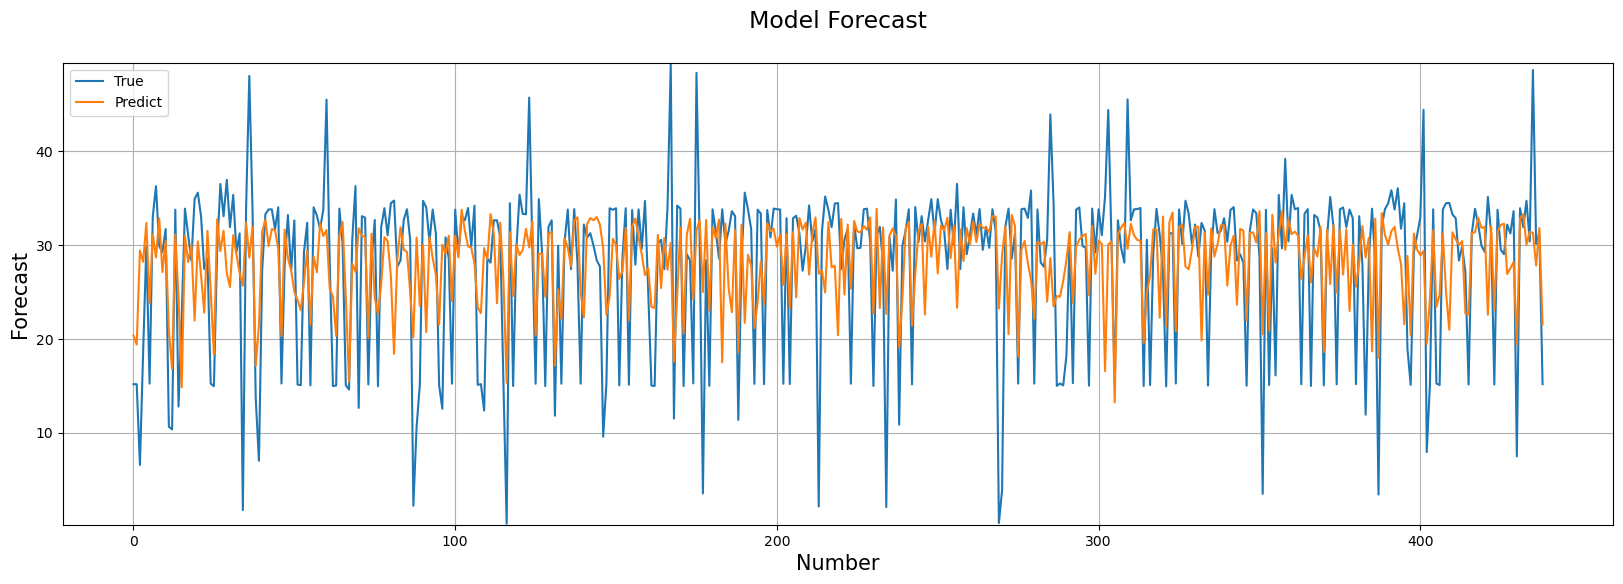

In [28]:
plot_forecast(model_M2.inverse_transform(y_test.reshape(-1, 1)), model_M2.inverse_transform(predict.reshape(-1, 1)))

In [29]:
def MSE(y_test, predict):

    score = mean_squared_error(y_test, predict)

    return score

In [30]:
MSE(y_test, predict.reshape(-1, 1))

0.021846439897830926